<a href="https://colab.research.google.com/github/NguyenHuynhNgoc20146187/AI/blob/main/Nutritional_Needs_Recommendation_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


22.11904761904762


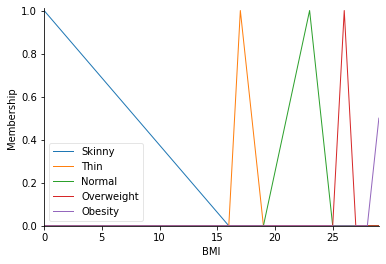

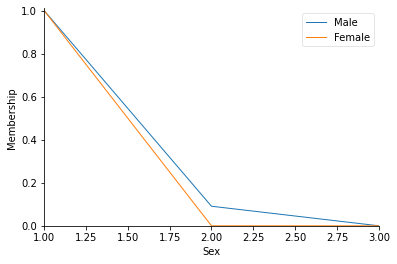

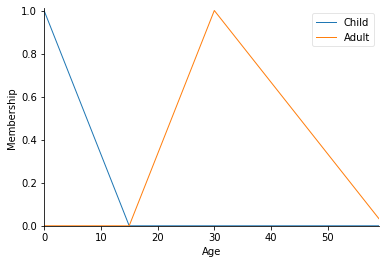

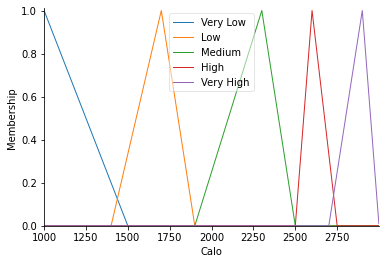

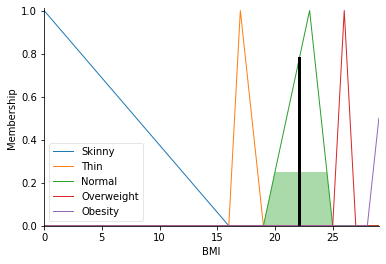

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

sex = ctrl.Antecedent(np.arange(1,4,1), 'Sex')
age = ctrl.Antecedent(np.arange(0,60,1), 'Age')
calo = ctrl.Antecedent(np.arange(1000,3000,1), 'Calo')
BMI = ctrl.Consequent(np.arange(0,30,1), 'BMI')


BMI['Skinny'] = fuzz.trimf(BMI.universe, [0,0,16])
BMI['Thin'] = fuzz.trimf(BMI.universe, [16,17,19])
BMI['Normal'] = fuzz.trimf(BMI.universe, [19,23,25])
BMI['Overweight'] = fuzz.trimf(BMI.universe, [26,26,27])
BMI['Obesity'] = fuzz.trimf(BMI.universe, [28,30,30])

sex['Male'] = fuzz.trimf(sex.universe, [0,1,2.1])
sex['Female'] = fuzz.trimf(sex.universe, [0,1,2])

age['Child'] = fuzz.trimf(age.universe, [0,0,15])
age['Adult'] = fuzz.trimf(age.universe, [15,30,60])

calo['Very Low'] = fuzz.trimf(calo.universe, [1000,1000,1500])
calo['Low'] = fuzz.trimf(calo.universe, [1400,1700,1900])
calo['Medium'] = fuzz.trimf(calo.universe, [1900,2300,2500])
calo['High'] = fuzz.trimf(calo.universe, [2500,2600,2750])
calo['Very High'] = fuzz.trimf(calo.universe, [2700,2900,3000])

BMI.view()
sex.view()
age.view()
calo.view()

rule1 = ctrl.Rule(sex['Male']& age['Child']& calo['Very Low'], BMI['Skinny'])
rule2 = ctrl.Rule(sex['Male']& age['Child']& calo['Low'], BMI['Thin'])
rule3 = ctrl.Rule(sex['Male']& age['Child']& calo['Medium'], BMI['Normal'])
rule4 = ctrl.Rule(sex['Male']& age['Child']& calo['High'], BMI['Overweight'])
rule5 = ctrl.Rule(sex['Male']& age['Child']& calo['Very High'], BMI['Obesity'])
rule6 = ctrl.Rule(sex['Male']& age['Adult']& calo['Very Low'], BMI['Thin'])
rule7 = ctrl.Rule(sex['Male']& age['Adult']& calo['Low'], BMI['Thin'])
rule8 = ctrl.Rule(sex['Male']& age['Adult']& calo['Medium'], BMI['Normal'])
rule9 = ctrl.Rule(sex['Male']& age['Adult']& calo['High'], BMI['Overweight'])
rule10 = ctrl.Rule(sex['Male']& age['Adult']& calo['Very High'], BMI['Obesity'])
rule11 = ctrl.Rule(sex['Female']& age['Child']& calo['Very Low'], BMI['Skinny'])
rule12 = ctrl.Rule(sex['Female']& age['Child']& calo['Low'], BMI['Skinny'])
rule13 = ctrl.Rule(sex['Female']& age['Child']& calo['Medium'], BMI['Thin'])
rule14 = ctrl.Rule(sex['Female']& age['Child']& calo['High'], BMI['Normal'])
rule15 = ctrl.Rule(sex['Female']& age['Child']& calo['Very High'], BMI['Overweight'])
rule16 = ctrl.Rule(sex['Female']& age['Adult']& calo['Very Low'], BMI['Thin'])
rule17 = ctrl.Rule(sex['Female']& age['Adult']& calo['Low'], BMI['Thin'])
rule18 = ctrl.Rule(sex['Female']& age['Adult']& calo['Medium'], BMI['Normal'])
rule19 = ctrl.Rule(sex['Female']& age['Adult']& calo['High'], BMI['Overweight'])
rule20 = ctrl.Rule(sex['Female']& age['Adult']& calo['Very High'], BMI['Obesity'])


BMIing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
BMIing= ctrl.ControlSystemSimulation(BMIing_ctrl)
BMIing.input['Sex']=1
BMIing.input['Age']=40
BMIing.input['Calo']=2000

BMIing.compute()
print(BMIing.output['BMI'])
BMI.view(sim=BMIing)